In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
data = pd.read_excel('data .xlsx',encoding='gb2312')

In [120]:
R=data[u'R(y or n)']
R.values[R.values==u'y']=1
R.values[R.values==u'n']=0
# R=R.to_frame()
data.values[:,1]=R.values

In [121]:
# data[u'R(y or n)']=data[u'R(y or n)'].astype('float64')
data[u'R(y or n)']=pd.to_numeric(data[u'R(y or n)'], errors='coerce')

In [122]:
#numpy方法求相关系数
T = data[u'T']
T_r = np.diff(T)/T[:-1]
R=data[u'R(y or n)']
R_r = np.diff(R)
R_r[np.isnan(R_r)]=0
covm = np.cov(T_r,R_r)
r=covm/(T_r.std()*R_r.std())
print(r)

[[0.94736445 0.34030712]
 [0.34030712 1.0919586 ]]


In [123]:
#pandas方法求相关系数
dataCorr = data.corr()
print(dataCorr)

                  T  R(y or n)
T          1.000000   0.122024
R(y or n)  0.122024   1.000000


In [124]:
isnan=np.isnan(data.values)
data.values[isnan]=-1
data.values[:,1][~isnan[:,1]]=0

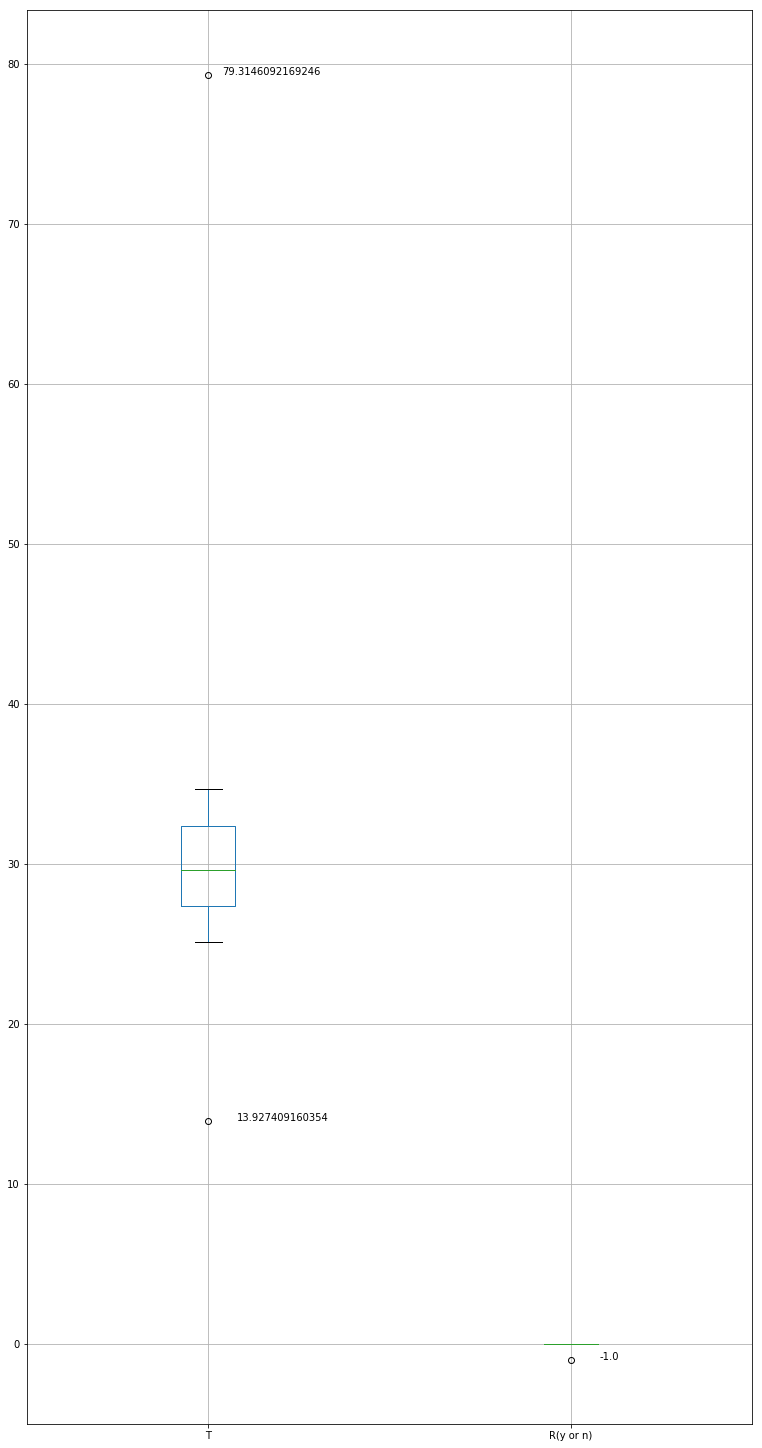

In [126]:
#箱形图找异常值
# T=data[u'T']
# R=data[u'R(y or n)']


#导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.figure(1, figsize=(13, 26))#可设定图像大小
# plt.figure() #建立图像
p = data.boxplot(return_type='dict') #画箱线图，直接使用DataFrame的方法.代码到这为止,就已经可以显示带有异常值的箱型图了,但为了标注出异常值的数值,还需要以下代码进行标注.
for index in range(len(p['fliers'])):
    x = p['fliers'][index].get_xdata() # 'flies'即为异常值的标签.[0]是用来标注第1位的异常值数值,同理[i]标注第i+1位的异常值.
    y = p['fliers'][index].get_ydata()
    y.sort() #从小到大排序
    
    print(index,':',y,'\n',sep='')
    
    for i in range(len(x)): 
        if i>0:
            plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.05 -0.8/(y[i]-y[i-1]),y[i]))
        else:
            plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.08,y[i]))
        


plt.show() #展示箱线图